<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/alura/intro-pandas/09_mais_sobre_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Extra) Mais sobre gráficos

Retornamos como mais uma aula extra de Pandas, e nela falaremos especificamente sobre Matlplotlib e alguns de seus recursos. Nesta aula criaremos um novo gráfico, salvá-lo e usá-lo em outros relatórios.

Foi criado mais um notebook dentro da pasta "extras", cujo título é **Mais Sobre Gráficos**. Realizamos as importações padrão:

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15,8))

Também evocamos um arquivo csv, disponível na pasta.

In [8]:
dados = pd.read_csv('aluguel.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


* Criaremos a área que sustentará o gráfico e iremos inserir quatro gráficos dentro dessa área.

* Dentro dessa figura haverá um gráfico, duas linhas e duas colunas na posição 1. Faremos o mesmo procedimento para o resto dos gráficos:



/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


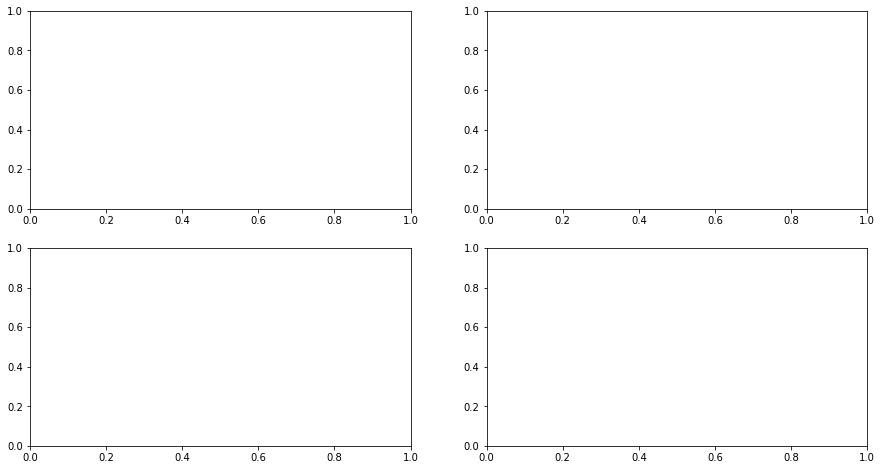

In [9]:
area = plt.figure()
g1 = area.add_subplot(2,2,1)

g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

* Começaremos produzindo um scatterplot, isto é, um gráfico de dispersão. Usaremos duas variáveis: `Valor` e `Area`;

* Criaremos o restante dos gráficos, e a cada um deles daremos um título diferente. No caso de `g3`, faremos uma amostra aleatória dentro do próprio dataframe. Neste caso, como já sabemos, o índice estará todo errado e fora de orndem. Para que possamos produzir um gráfico interessante, devemos refazer o índice ao escrever `dados_g3.index = range(dados_g3.shape[0])` em nosso código

In [10]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor X Area')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100)
dados_g3 = dados_g3.reset_index(drop=True)
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

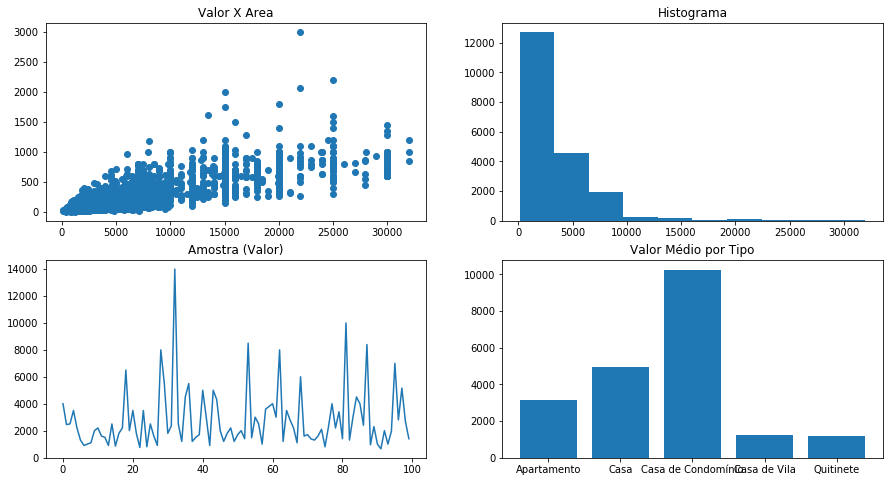

In [11]:
area

Ao executarmos nosso código teremos quatro tipos diferentes de gráficos na mesma área, sendo o primeiro um gráfico de dispersão, o segundo um histograma, o terceiro uma amostra da variável `Valor`, e por fim o tradicional gráfico em barras que representa o valor médio por tipos de imóvel.

Nos resta salvar esses conteúdos, e para fazer isso escreveremos


In [0]:
area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')

Incluímos os argumentos `dpi`, que configura a resolução, e o `bbox`, que remove a borda branca da área do gráfico, torando nossa apresentação mais elegante. Ao executarmos o código, o salvamento já terá sido realizado.

---

## Exercício 07

In [15]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')
dados.head()


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


Text(0.5, 1.0, 'Total de Imóveis por Tipo')

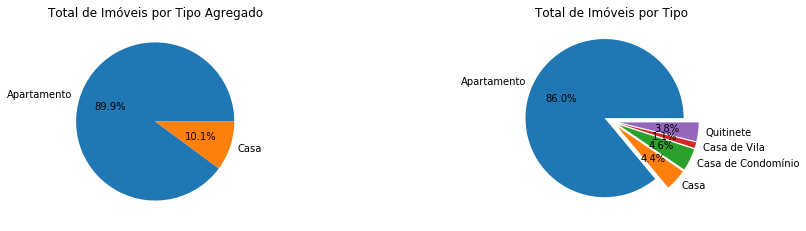

In [18]:
area = plt.figure()
g1 = area.add_subplot(2,2,1)
g2 = area.add_subplot(2,2,2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode=(.1,.1,.1,.1,.1))
g2.set_title('Total de Imóveis por Tipo')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

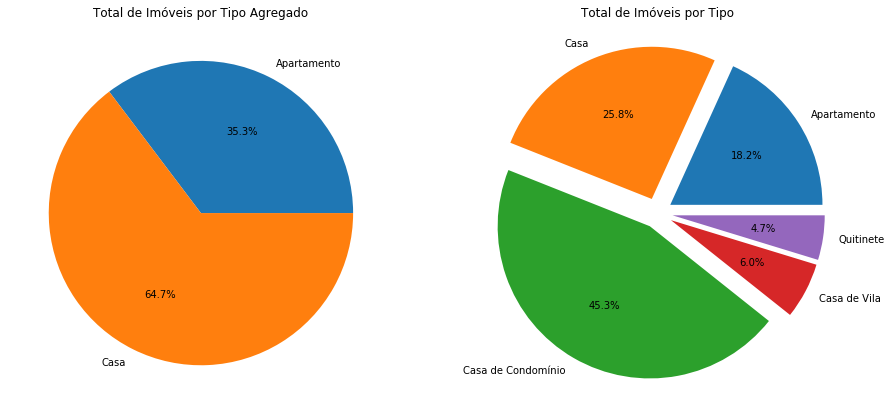

In [19]:
area = plt.figure()
g1 = area.add_subplot(1,2,1)
g2 = area.add_subplot(1,2,2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.mean().index
valores = grupo1.mean().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.mean().index
valores = grupo2.mean().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode=(.1,.1,.1,.1,.1))
g2.set_title('Total de Imóveis por Tipo')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

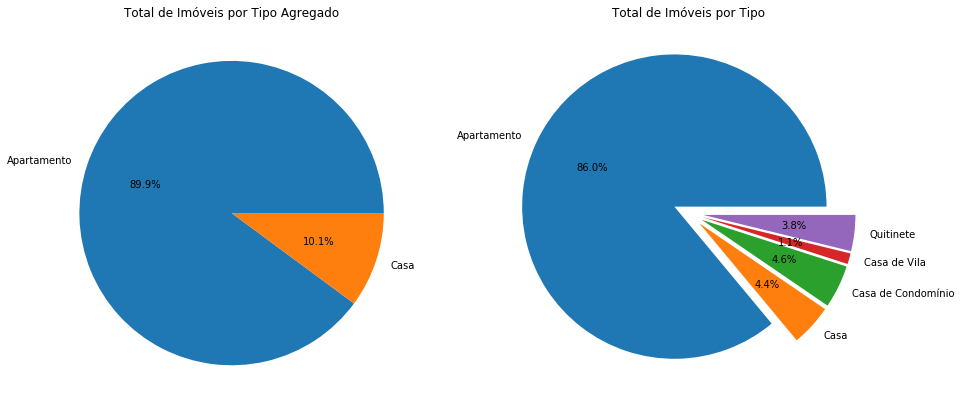

In [20]:
area = plt.figure()
g1 = area.add_subplot(1,2,1)
g2 = area.add_subplot(1,2,2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode=(.1,.1,.1,.1,.1))
g2.set_title('Total de Imóveis por Tipo')